
# Data Loading and Initial Exploration
## loading data from CSV file

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')

In [10]:
# Basic dataset info
print("Dataset Shape", df.shape)
print("\nTarget variable sale_price statistics:")
print(df['sale_price'].describe())
print(f"\nPrice Range: {df['sale_price'].min():,.0f} - {df['sale_price'].max():,.0f}")

Dataset Shape (200000, 47)

Target variable sale_price statistics:
count    2.000000e+05
mean     5.841495e+05
std      4.170595e+05
min      5.029300e+04
25%      3.050000e+05
50%      4.599500e+05
75%      7.249500e+05
max      2.999950e+06
Name: sale_price, dtype: float64

Price Range: 50,293 - 2,999,950


## Data Quality Assessment

In [7]:
# Checking for missing values
print("\nMissing values in dataset:")
missing_values = df.isnull().sum()
missing_values_perc = (missing_values/len(df))*100
missing_df =  pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_values_perc
}).sort_values(by='Missing Values', ascending=False)

print(missing_df[missing_df['Missing Values'] > 0])


Missing values in dataset:
             Missing Values  Percentage
sale_nbr              42182     21.0910
subdivision           17550      8.7750
submarket              1717      0.8585


In [8]:
# Duplicates values

print(f"\nDuplicated values:{df.duplicated().sum()}")


Duplicated values:0


In [14]:
# Basic info about key columns

print(f"Number of unique values in categorical columns")
print(f"Cities:{df['city'].nunique()}")
print(f"Zoning types:{df['zoning'].nunique()}")
print(f"Submarkets:{df['submarket'].nunique()}")

Number of unique values in categorical columns
Cities:41
Zoning types:500
Submarkets:19


## EDA: Visualizations

Text(0, 0.5, 'Frequency')

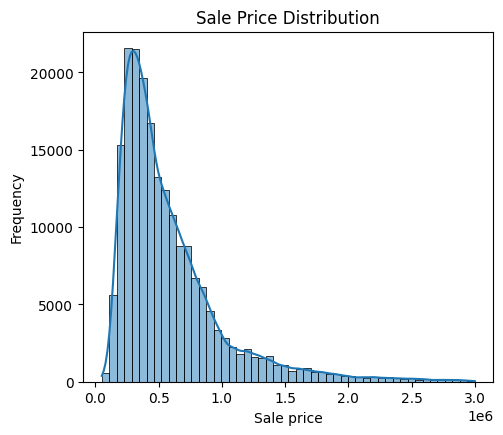

In [16]:
# Visualization of target variable distribution

plt.figure(figsize=(18,10))

plt.subplot(2, 3, 1)
sns.histplot(df['sale_price'].dropna(), bins=50, kde=True)
plt.title('Sale Price Distribution')
plt.xlabel('Sale price')
plt.ylabel('Frequency')


In [17]:
# Skewness in target variable
df['sale_price'].skew()


np.float64(2.0924063735613143)

Text(0, 0.5, 'Frequency')

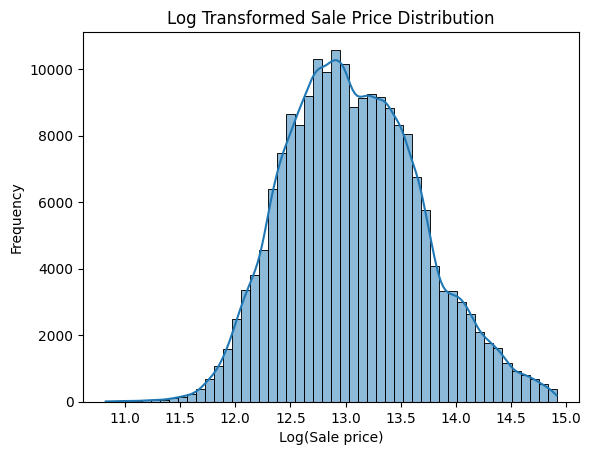

In [67]:
# log tranformed price of target variable


sns.histplot(np.log1p(df['sale_price']), bins=50, kde=True)
plt.title('Log Transformed Sale Price Distribution')
plt.xlabel('Log(Sale price)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Average Sale Price')

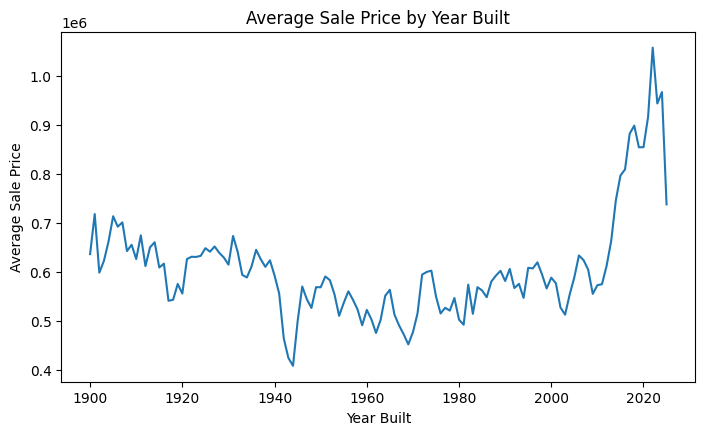

In [23]:
# Price by year
plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
df.groupby('year_built')['sale_price'].mean().plot(kind='line')
plt.title('Average Sale Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price')

Text(0, 0.5, 'Average Sale Price$')

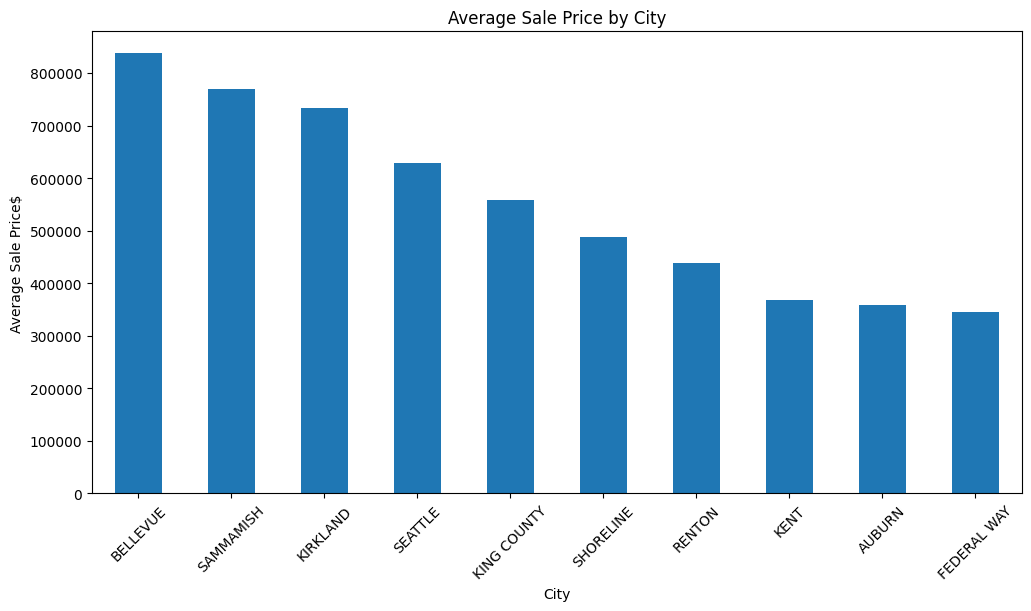

In [25]:
# Grouping by city on the basis of mean SalePrice

top_cities = df['city'].value_counts().head(10).index
city_prices = df[df['city'].isin(top_cities)].groupby('city')['sale_price'].mean().sort_values(ascending=False)
city_prices.plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=45)
plt.title('Average Sale Price by City')
plt.xlabel('City') 
plt.ylabel('Average Sale Price$') 

Text(0, 0.5, 'Average Sale Price')

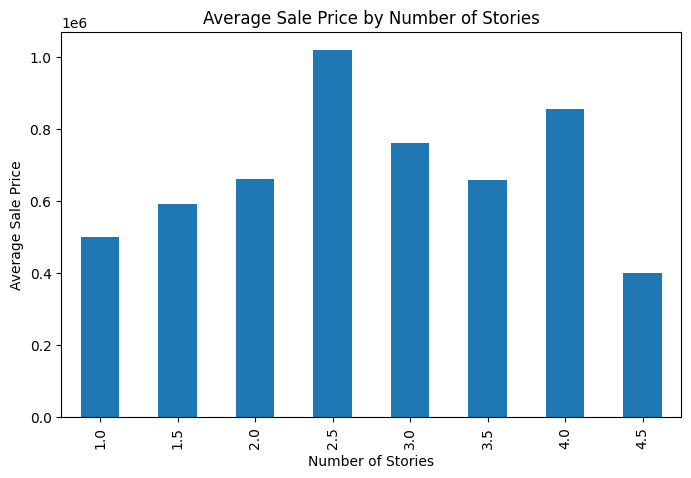

In [65]:
# Saleprice by number of stories

plt.figure(figsize=(8, 5))
df.groupby('stories')['sale_price'].mean().plot(kind='bar')
plt.title('Average Sale Price by Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Average Sale Price')

Text(0, 0.5, 'Average Sale Price')

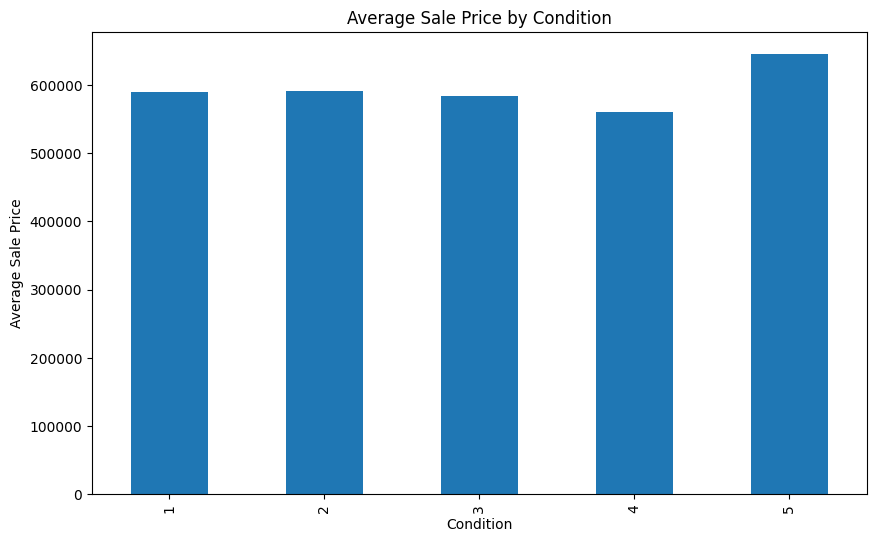

In [35]:
#Price by condition


plt.figure(figsize=(10, 6))
df.groupby('condition')['sale_price'].mean().plot(kind='bar')
plt.title('Average Sale Price by Condition')
plt.xlabel('Condition') 
plt.ylabel('Average Sale Price')


## Geo-Location Analysis

Text(0, 0.5, 'Latitude')

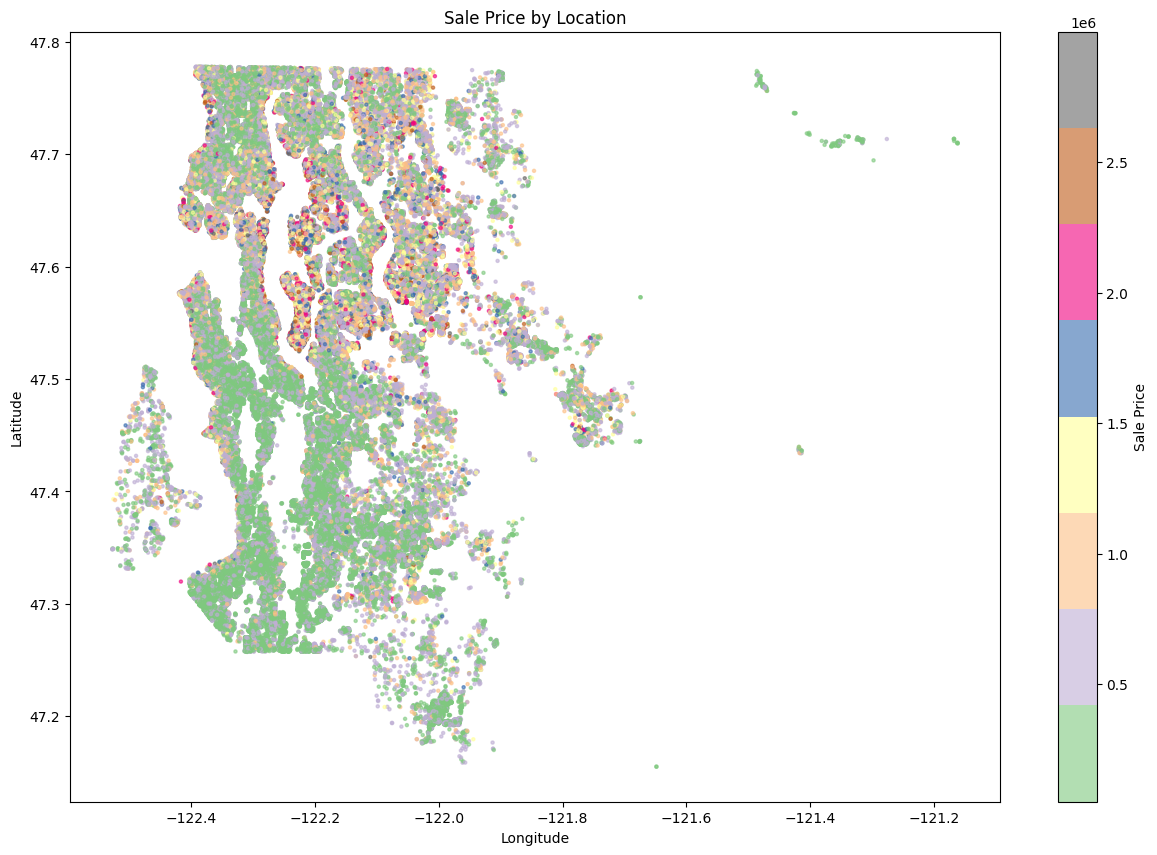

In [43]:
# Price by Location

plt.figure(figsize=(15,10))

scatter = plt.scatter(df['longitude'], df['latitude'], c=df['sale_price'], cmap='Accent', alpha=0.6, s=5)
plt.colorbar(scatter, label='Sale Price')
plt.title('Sale Price by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


Text(0, 0.5, 'Average Sale Price')

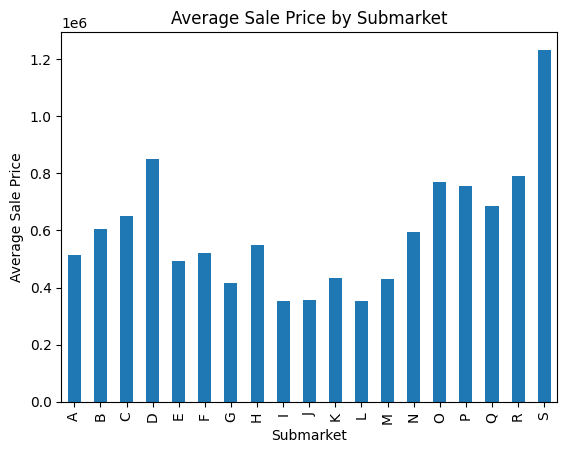

In [66]:
# Submarket Analysis


submarket_stats = df.groupby('submarket')['sale_price'].agg(['mean'],['count'])
submarket_stats['mean'].plot(kind='bar')
plt.title('Average Sale Price by Submarket')
plt.xlabel('Submarket')
plt.ylabel('Average Sale Price')

Text(0, 0.5, 'Average Sale Price')

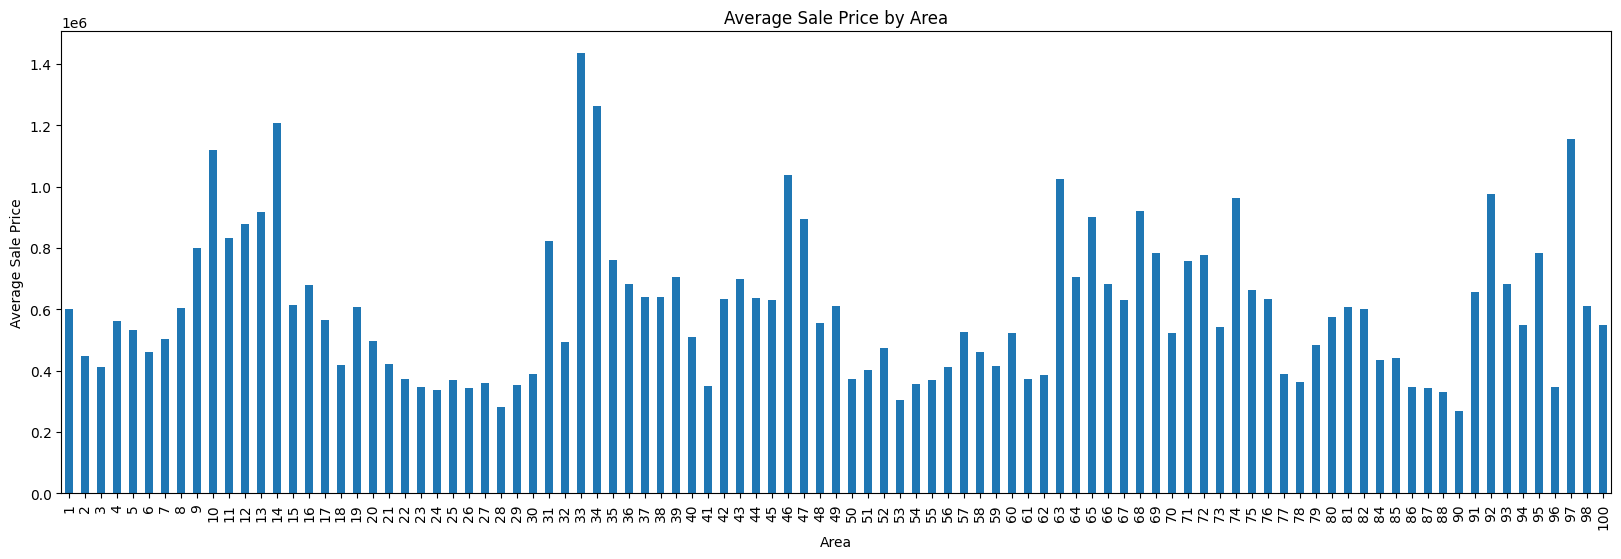

In [61]:
# Price by area

plt.figure(figsize=(20, 6))
df.groupby('area')['sale_price'].mean().plot(kind='bar',)
plt.title('Average Sale Price by Area')
plt.xlabel('Area')
plt.ylabel('Average Sale Price')

Text(0, 0.5, 'Sale Price')

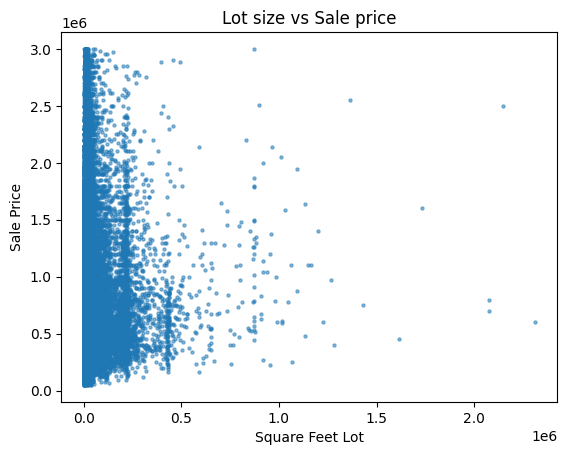

In [64]:
# Lot size and price

plt.scatter(df['sqft_lot'], df['sale_price'], alpha=0.5, s=5)
plt.title('Lot size vs Sale price')
plt.xlabel('Square Feet Lot')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Average Sale Price')

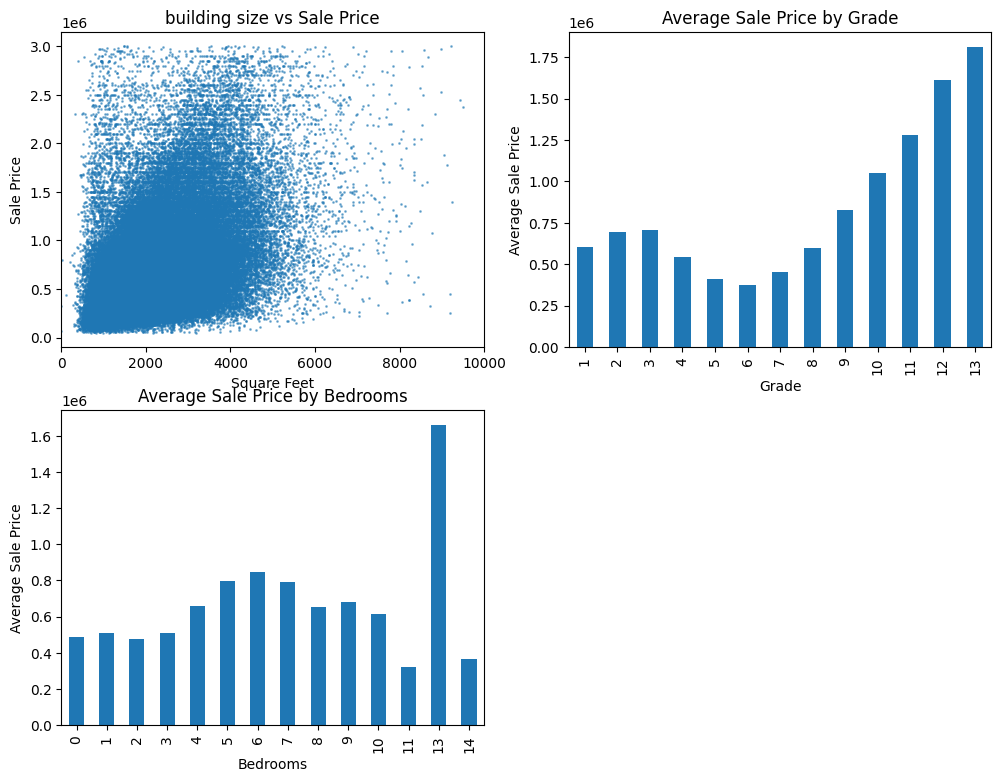

In [75]:
# Building size vs Sale Price
plt.figure(figsize=(12, 9))

plt.subplot(2, 2, 1)
plt.scatter(df['sqft'], df['sale_price'], alpha=0.5, s=1)
plt.title('building size vs Sale Price')
plt.xlabel('Square Feet')
plt.ylabel('Sale Price')
plt.xlim(0, 10000)  # Limit x-axis for better visibility



# Grade vs Sale Price

plt.subplot(2, 2, 2)
df.groupby('grade')['sale_price'].mean().plot(kind='bar')
plt.title('Average Sale Price by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Sale Price')


# Bedroom vs Sale Price

plt.subplot(2, 2, 3)
df.groupby('beds')['sale_price'].mean().plot(kind='bar')
plt.title('Average Sale Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Average Sale Price')




